In [1]:
"""
Malaysian Election data dimension importance analysis via RandomForest by Jamie K
Questions to explore: 
1. Treating each age group as a dimension, which are the most important age groups that affect the election outcome?
2. Are these dimensions just as important in Y2013 elections? Which age groups were important in Y2013 and which were important in Y2018?

"""
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
color_cycle = 'bgrcmyk'

In [2]:
ge14 = pd.read_excel("Tindak_GE14_Demographics_2018.xlsx", sheet_name = "age and ethnicity")
ge14 = ge14[['namaparlimen','Age 21 - 30 (%)','Age 31 - 40 (%)','Age 41 - 50 (%)',
             'Age 51 - 60 (%)','Age 61 - 70 (%)','Age 71 - 80 (%)','Age 81 - 90 (%)','Age > 90 (%)',
             'Melayu (%)','Cina (%)','India (%)','Bumiputera Sabah (%)','Bumiputera Sarawak (%)','Orang Asli (%)','Lain-Lain (%)',
             'GE 2018 COALITION WINNER']]
ge14.set_index('namaparlimen', inplace = True)

#Split the data into train & test sets (0.90 & 0.10 size resepectively)
#Fixed variable for random state to enable replication of results
X_train, X_test, Y_train, Y_test = train_test_split(
    ge14[['Age 21 - 30 (%)','Age 31 - 40 (%)','Age 41 - 50 (%)','Age 51 - 60 (%)','Age 61 - 70 (%)','Age 71 - 80 (%)','Age 81 - 90 (%)','Age > 90 (%)',
          'Melayu (%)','Cina (%)','India (%)','Bumiputera Sabah (%)','Bumiputera Sarawak (%)','Orang Asli (%)','Lain-Lain (%)']], 
    ge14['GE 2018 COALITION WINNER'], test_size = 0.10, random_state = 3)

#Initiate and train random forest model. Custom parameters:
#n_estimators: default is 10 but we are using 100 to reduce overfitting
#Fixed variable for random state to enable replication of results
clf = RandomForestClassifier(n_estimators = 100, random_state = 3)
clf.fit(X_train, Y_train)

print ("Accuracy of random forest in predicting electoral outcomes based on age group composition.")
print ("-----------------")
print ("Hygiene check: Accuracy of prediction on TRAIN data split (should be 100% accurate): {}".format(clf.score(X_train, Y_train)))
print ("Accuracy of prediction on TEST data split: {}".format(clf.score(X_test, Y_test)))
print ("-----------------")

Accuracy of random forest in predicting electoral outcomes based on age group composition.
-----------------
Hygiene check: Accuracy of prediction on TRAIN data split (should be 100% accurate): 1.0
Accuracy of prediction on TEST data split: 0.9130434782608695
-----------------


### Interpreting Random Forest Results

The model produced a pretty accurate prediction (91% accuracy) on 23 parliamentary seats (10% of the data is TEST data, and total rows was 222). But, let's actually look at a crosstab of the actual winner vs the model's predicted winner.

In [3]:
ge14["Random_forest_predicted_winner"] = clf.predict(ge14[['Age 21 - 30 (%)','Age 31 - 40 (%)','Age 41 - 50 (%)','Age 51 - 60 (%)','Age 61 - 70 (%)','Age 71 - 80 (%)',
                                                           'Age 81 - 90 (%)','Age > 90 (%)',
                                                           'Melayu (%)','Cina (%)','India (%)','Bumiputera Sabah (%)','Bumiputera Sarawak (%)','Orang Asli (%)','Lain-Lain (%)']])

ge14_crosstab = ge14.reset_index()
Y_rtest = Y_test.to_frame().reset_index()
ge14_crosstab = ge14_crosstab.merge(Y_rtest, how = 'inner', on = 'namaparlimen')

ge14_crosstab["Correct Prediction"] = np.nan
ge14_crosstab.loc[ge14_crosstab["GE 2018 COALITION WINNER_x"] == ge14_crosstab["Random_forest_predicted_winner"], "Correct Prediction"] = "YES"
ge14_crosstab.loc[ge14_crosstab["Correct Prediction"].isnull(), "Correct Prediction"] = "NO"
ge14_crosstab.set_index("namaparlimen", inplace=True)
ge14_crosstab[["GE 2018 COALITION WINNER_x", "Random_forest_predicted_winner", "Correct Prediction"]]

,GE 2018 COALITION WINNER_x,Random_forest_predicted_winner,Correct Prediction
namaparlimen,,,
KETEREH,BN,BN,YES
KUALA NERUS,Gagasan Sejahtera,BN,NO
DUNGUN,Gagasan Sejahtera,Gagasan Sejahtera,YES
KEPALA BATAS,BN,BN,YES
BUKIT BENDERA,PH,PH,YES
IPOH BARAT,PH,PH,YES
GOPENG,PH,PH,YES
KUANTAN,PH,PH,YES
KUALA SELANGOR,PH,PH,YES


Thus, we can see the model is quite accurate in predicting the winners (only 2 mistakes). To improve the accuracy, we need a larger dataset. However, given the dataset is limited by the actual number of constituencies - this is possibly the best outcome we can hope to achieve

### According to the algorithm, which is the most important age and ethinic group in deciding the election winner?

Now, for the ultimate reveal of the age and ethnic group with the most influence on the Y2018 electorial results - this is the whole point of the exercise. An unbiased method of learning the 'most influential age group' and 'most influential ethnicity group' in deciding Y2018's election results.

<IPython.core.display.Javascript object>


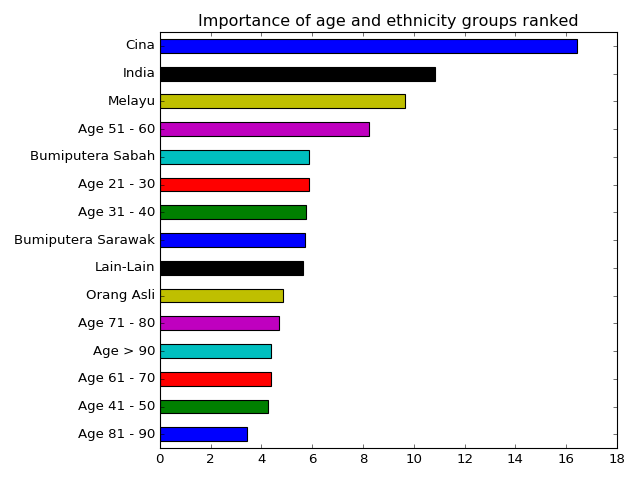

In [4]:
importance = pd.Series(clf.feature_importances_, index=X_train.columns)
importance.index = importance.index.map(lambda x: str(x)[:-4])

f_importance = importance.to_frame()
f_importance.rename(columns = {0 : "Importance Weigh"}, inplace = True)
f_importance.sort_values("Importance Weigh",ascending = True, inplace = True)
f_importance.loc[:,"Importance Weigh"] = f_importance["Importance Weigh"]*100

f_importance.plot(kind='barh', title = "Importance of age and ethnicity groups ranked", legend = False, color = color_cycle)
plt.tight_layout()
#plt.savefig("Age and Ethnicity Ranked_together.png")
#plt.show()

<IPython.core.display.Javascript object>


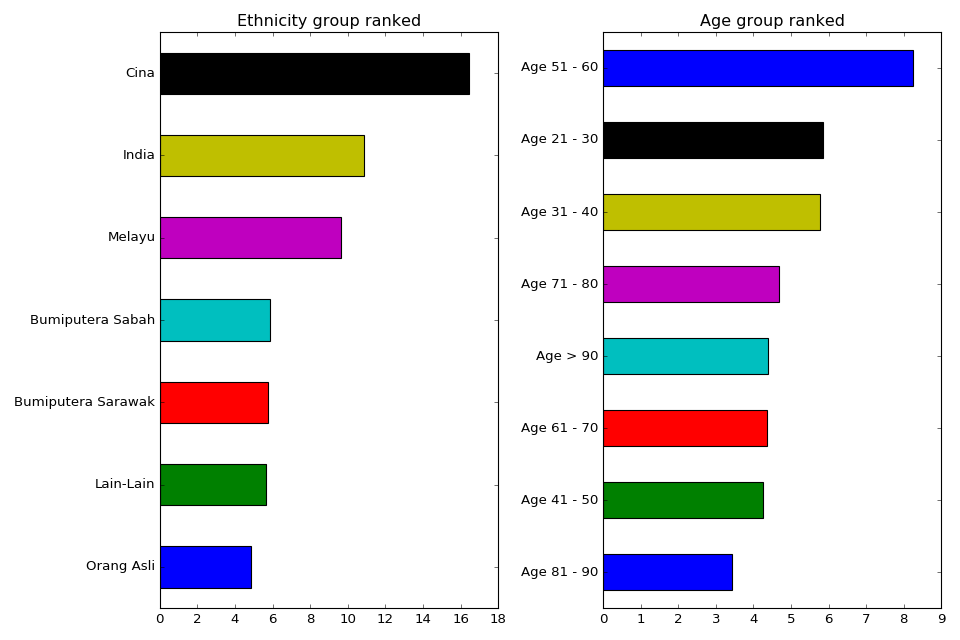

In [5]:
age_importance = f_importance.loc[('Age 81 - 90','Age 41 - 50','Age 61 - 70','Age > 90','Age 71 - 80','Age 31 - 40','Age 21 - 30','Age 51 - 60'),:].copy()
age_importance.sort_values(by = 'Importance Weigh',ascending = True, inplace = True)

ethnicity_importance = f_importance.loc[('Cina','India','Melayu','Bumiputera Sabah','Bumiputera Sarawak','Lain-Lain','Orang Asli'),:].copy()
ethnicity_importance.sort_values(by = 'Importance Weigh',ascending = True, inplace = True)

fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
ethnicity_importance.plot(ax = axes[0], kind='barh', title = "Ethnicity group ranked", legend = False, color = color_cycle)
age_importance.plot(ax = axes[1],kind='barh', title = "Age group ranked", legend = False, color = color_cycle)
plt.tight_layout()
#plt.savefig("Age and Ethnicity Ranked_Separately.png")
#plt.show()